In [1]:
from google.colab import files


uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/water_potability.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import scipy
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/water_potability.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#There are a lot of NaN in 'ph', 'Sulfate' and 'Trihalomethanes'. So at first, we filled NaN by IterativeImputer.

In [6]:
x = df.drop(["Potability"],axis=1)
y = df["Potability"]
# print(x)

x = x.values

In [7]:
x

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(x,y)
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

IterativeImputer(max_value=None, min_value=None, random_state=0)

In [9]:
x=imp.transform(x)

In [10]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)
df=pd.concat([x, y],axis=1)
df=df.rename({0:'ph',1:'Hardness',2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Conductivity',
       6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity'}, axis='columns')

In [11]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.474992   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
# Data Visualization¶
#1) Histplot of features by "Potability"

In [14]:
num=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

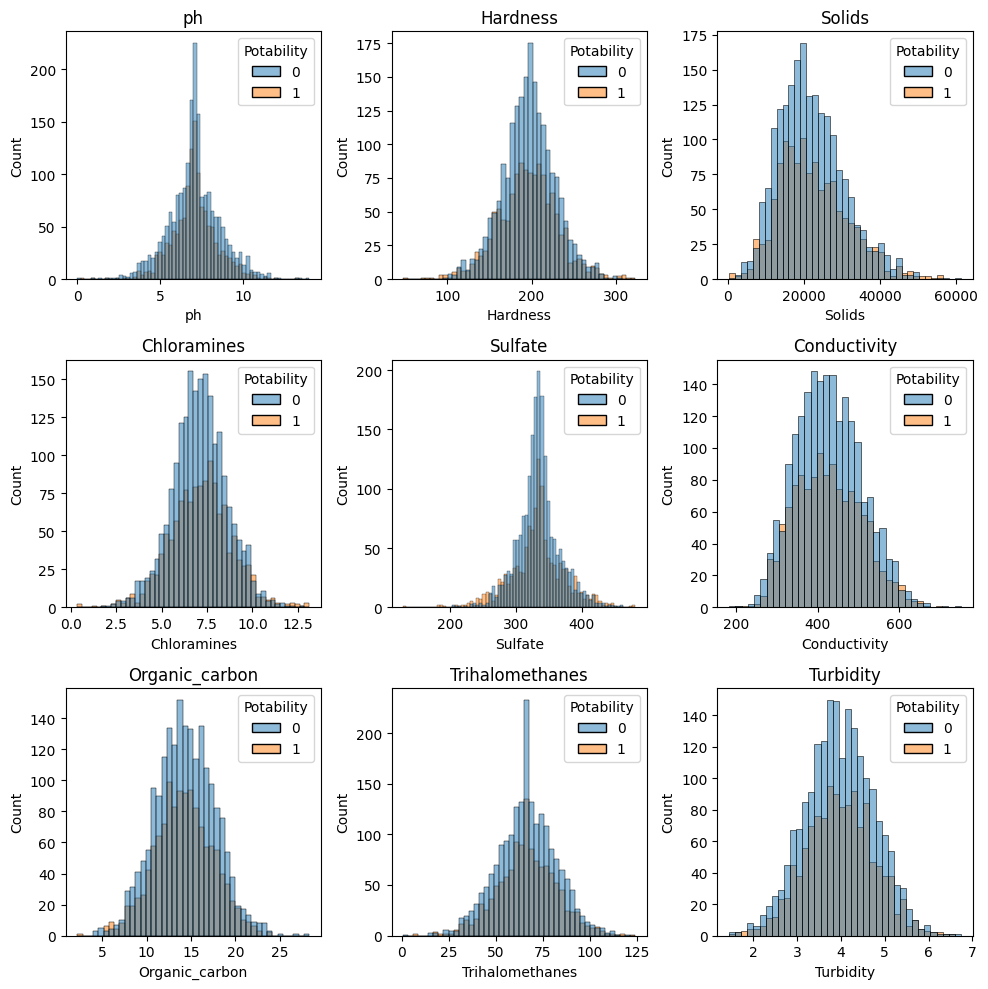

In [15]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num)):
    plt.subplot(3,3,i+1)
    plt.title(num[i])
    sns.histplot(data=df,x=df[num[i]],hue='Potability')
plt.tight_layout()
plt.show()


In [16]:

#HISTPLOT OF FEATURES OF WATER BY POTABILITY

In [17]:
# Both "Portability=0" and "Portability=1" are normal distributions in all the features.

In [18]:
# 2) The means of each features by "Portability=0" and "Portability=1"

In [19]:
df.groupby('Potability').mean().T

Potability                  0             1
ph                   7.085197      7.072237
Hardness           196.733292    195.800744
Solids           21777.490788  22383.991018
Chloramines          7.092175      7.169338
Sulfate            334.380671    332.853768
Conductivity       426.730454    425.383800
Organic_carbon      14.364335     14.160893
Trihalomethanes     66.308013     66.532042
Turbidity            3.965800      3.968328

In [20]:
# There are no significant difference of means between "Portability=0" and "Portability=1".

In [21]:
fmt="1.1f"

In [22]:
# 3) Correlation heatmap

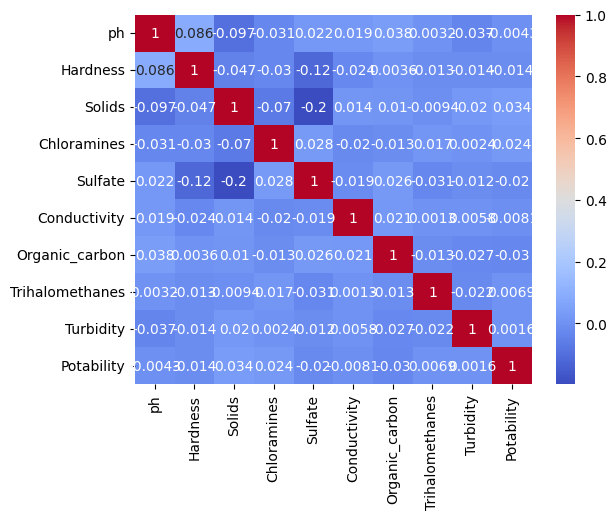

In [23]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm');

In [24]:
# There are no strong correlation among features.

In [25]:
# 4) Pairplot by "Portability=0" and "Portability=1".

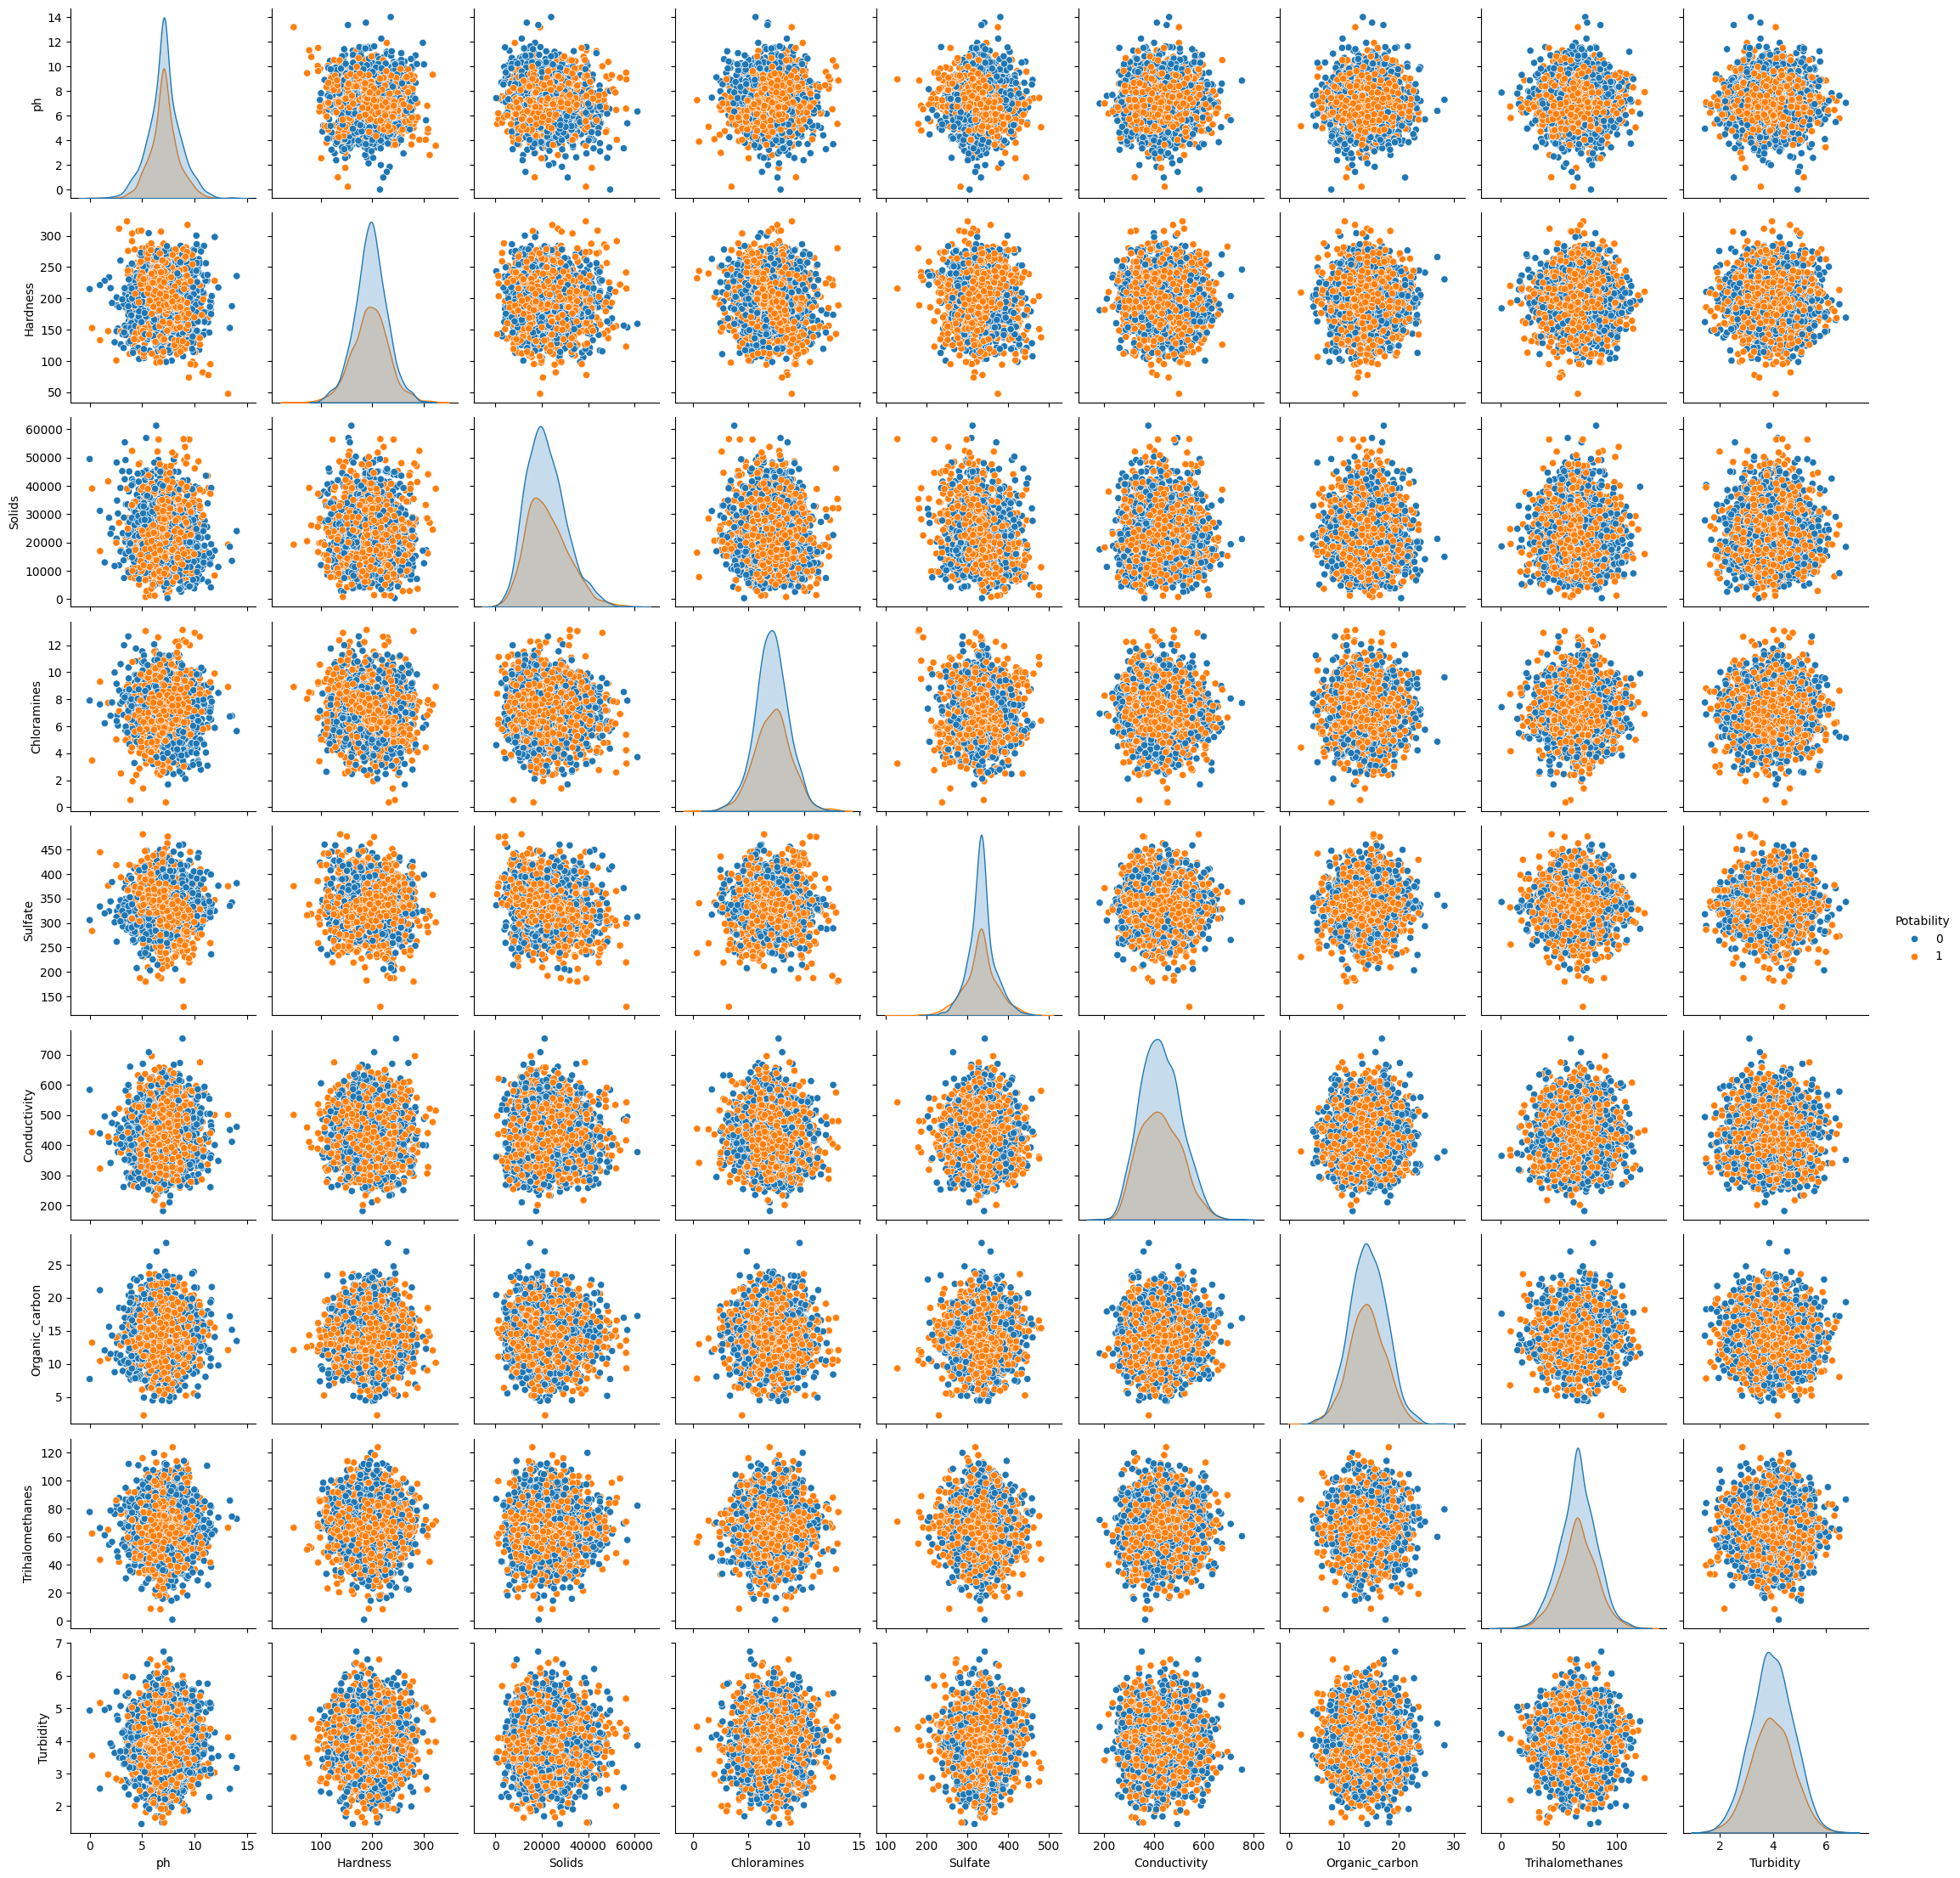

In [26]:
sns.pairplot(df,hue='Potability');

In [27]:
# There seem to be similar distributions between "Portability=0" and "Portability=1". So it may be very difficult to build high acurate model to classify.

#As next step, we tried to bin each features to three.

In [28]:
X = df.drop(["Potability"],axis=1)
y = df["Potability"]

In [29]:
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.474992   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [30]:
X['ph']=pd.cut(X['ph'],3,labels=False)
X['Hardness']=pd.cut(X['Hardness'],3,labels=False)
X['Solids']=pd.cut(X['Solids'],3,labels=False)
X['Chloramines']=pd.cut(X['Chloramines'],3,labels=False)
X['Sulfate']=pd.cut(X['Sulfate'],3,labels=False)
X['Conductivity']=pd.cut(X['Conductivity'],3,labels=False)
X['Organic_carbon']=pd.cut(X['Organic_carbon'],3,labels=False)
X['Trihalomethanes']=pd.cut(X['Trihalomethanes'],3,labels=False)
X['Turbidity']=pd.cut(X['Turbidity'],3,labels=False)

In [31]:
X

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  
0                  0                2          0  
1                  1                1          1  
2                  1                1          0  
3                  1                2          1  
4                  1                0          1  
...              ...              ...        ...  
3271               1                1          1  
3272               2                1          0  
3273               1                1          1  
3274               1                1          1  
3275               1                1          0  

[3276 rows x 9 columns]

In [32]:
# As third step, I also tried to add clustering as another feature.

#Clustering

In [33]:
from sklearn.cluster import KMeans

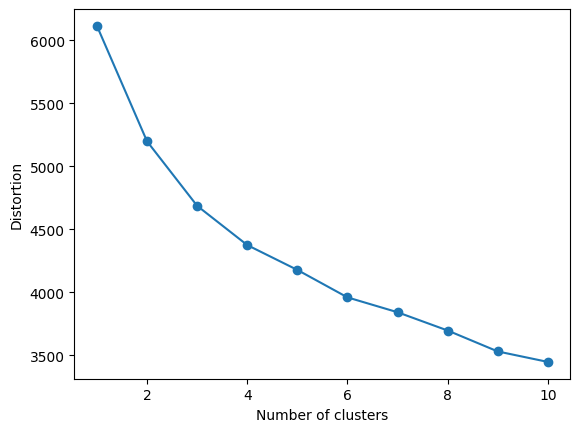

In [34]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [35]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(X)

KMeans(n_clusters=3, random_state=1)

In [36]:
cluster = model.labels_

In [37]:
X['Cluster']=cluster

In [38]:
X

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  Cluster  
0                  0                2          0        0  
1                  1                1          1        0  
2                  1                1          0        0  
3                  1                2          1        1  
4                  1                0          1        0  
...              ...              ...        ...      ...  
3271               1                1          1        2  
3272               2                1          0        0  
3273               1                1          1        2  
3274               1                1          1        0  
3275               1                1          0        1  

[3276 rows x 10 columns]

In [39]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster'],
      dtype='object')

In [40]:
categorical_features_indices = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
df.groupby('Potability').count()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                               
0           1998      1998    1998         1998     1998          1998   
1           1278      1278    1278         1278     1278          1278   

            Organic_carbon  Trihalomethanes  Turbidity  
Potability                                              
0                     1998             1998       1998  
1                     1278             1278       1278

In [43]:
#There are some imbalrance between "Portability=0" and "Portability=1". So I tried to balancee by smote.

#SMOTE

In [44]:
pip install imbalanced-learn

In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [46]:
oversample = SMOTE()
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)

In [47]:
counter = Counter(y_train)

In [48]:
Counter(y_train_s)

Counter({0: 1381, 1: 1381})

In [49]:
#Modeling by catboost

In [50]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:

    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    print('Environment: Google Colab')

from catboost import CatBoostClassifier, Pool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.6 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Environment: Google Colab


In [51]:
train_pool = Pool(X_train_s, y_train_s, cat_features=categorical_features_indices)
validate_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

In [52]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [53]:
from catboost import CatBoostClassifier

In [54]:
params = {
    'depth' : 6,
    'learning_rate' : 0.16,
    'early_stopping_rounds' : 10,
    'iterations' : 200,
    'custom_loss' :['Accuracy'],
    'random_seed' :42
}
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

0:	learn: 0.6872235	test: 0.6898926	best: 0.6898926 (0)	total: 87.6ms	remaining: 17.4s
1:	learn: 0.6844846	test: 0.6879712	best: 0.6879712 (1)	total: 125ms	remaining: 12.4s
2:	learn: 0.6809463	test: 0.6861768	best: 0.6861768 (2)	total: 145ms	remaining: 9.55s
3:	learn: 0.6803789	test: 0.6857926	best: 0.6857926 (3)	total: 156ms	remaining: 7.62s
4:	learn: 0.6794473	test: 0.6850695	best: 0.6850695 (4)	total: 173ms	remaining: 6.74s
5:	learn: 0.6789409	test: 0.6845912	best: 0.6845912 (5)	total: 184ms	remaining: 5.94s
6:	learn: 0.6771440	test: 0.6838365	best: 0.6838365 (6)	total: 212ms	remaining: 5.84s
7:	learn: 0.6758905	test: 0.6841051	best: 0.6838365 (6)	total: 234ms	remaining: 5.63s
8:	learn: 0.6749539	test: 0.6840189	best: 0.6838365 (6)	total: 260ms	remaining: 5.51s
9:	learn: 0.6726128	test: 0.6833103	best: 0.6833103 (9)	total: 287ms	remaining: 5.45s
10:	learn: 0.6717961	test: 0.6832834	best: 0.6832834 (10)	total: 316ms	remaining: 5.43s
11:	learn: 0.6717930	test: 0.6832703	best: 0.683270

In [55]:
y_pred=model.predict(X_test)

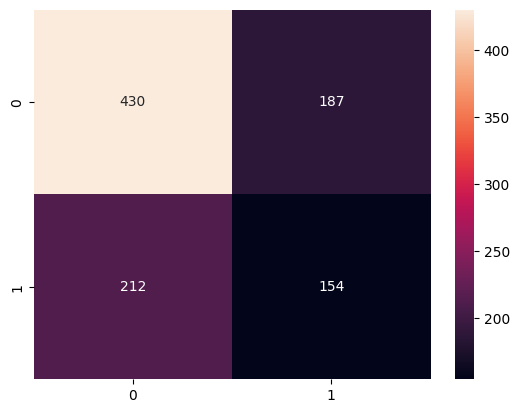

In [56]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt="d");

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cd /content/drive/MyDrive/NASA_COMPETITION


/content/drive/MyDrive/NASA_COMPETITION


In [ ]:
ls

DeltaX_GrainSizeDistribution_Fall2021.csv    pad_water_quality_2011.csv
DeltaX_GrainSizeDistribution_Spring2021.csv  pad_water_reflectance_2011.csv
First.ipynb                                  PreDeltaX_WaterLevel_Atchafalaya_WL04.csv
pad_water_quality_2010.csv


In [ ]:
deltaX_grainsizeFall = pd.read_csv('DeltaX_GrainSizeDistribution_Fall2021.csv')
deltaX_grainsizeSpring = pd.read_csv('DeltaX_GrainSizeDistribution_Spring2021.csv')
pad_quality_2011 = pd.read_csv('pad_water_quality_2011.csv')
pad_reflectance_2011 = pd.read_csv('pad_water_reflectance_2011.csv')
pad_quality_2010 = pd.read_csv('pad_water_quality_2010.csv')
WaterLevel_Atchafalaya = pd.read_csv('PreDeltaX_WaterLevel_Atchafalaya_WL04.csv')

In [ ]:
deltaX_grainsizeFall

basin   campaign         site_id   latitude  longitude  \
0   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
1   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
2   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
3   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
4   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
..          ...        ...             ...        ...        ...   
58   Terrebonne  Fall_2021        CRMS0421  29.171650 -90.825015   
59   Terrebonne  Fall_2021        CRMS0421  29.171670 -90.825049   
60   Terrebonne  Fall_2021        CRMS0421  29.171635 -90.825075   
61   Terrebonne  Fall_2021        CRMS0421  29.171644 -90.825063   
62   Terrebonne  Fall_2021        CRMS0421  29.171670 -90.825088   

              date_time  water_velocity  water_temp  water_salinity  \
0   2021-08-18 18:06:00        0.038209        33.8           0.202   
1   2021-08-18 18:12:00        0.080401        33.8           0.202   
2   2021-08-18 18:15:00        0.087354        33.8           0.202   
3   2021-08-18 18:20:00        0.075218        33.8           0.202   
4   2021-08-18 17:54:00        0.067098        33.8           0.202   
..                  ...             ...         ...             ...   
58  2021-08-19 18:26:00        1.242776        34.1       -9999.000   
59  2021-08-19 18:36:00        1.292816        34.1       -9999.000   
60  2021-08-19 18:36:00        1.295455        34.1       -9999.000   
61  2021-08-19 18:41:00        1.364334        34.1       -9999.000   
62  2021-08-19 18:45:00        1.473721        34.1       -9999.000   

    water_depth  ...  sd_sediment_concentration_grainsize_832_913  \
0          0.82  ...                                     0.000000   
1          0.82  ...                                     0.000000   
2          0.82  ...                                     0.000000   
3          0.82  ...                                     0.089253   
4          0.82  ...                                     0.000000   
..          ...  ...                                          ...   
58         3.00  ...                                     0.005215   
59         3.00  ...                                     0.027947   
60         3.00  ...                                     0.000000   
61         3.00  ...                                     0.014475   
62         3.00  ...                                     0.012991   

    sd_sediment_concentration_grainsize_913_1000  \
0                                   0.000000e+00   
1                                   0.000000e+00   
2                                   3.230000e-08   
3                                   6.458398e-02   
4                                   0.000000e+00   
..                                           ...   
58                                  3.835354e-03   
59                                  2.175642e-02   
60                                  0.000000e+00   
61                                  1.116096e-02   
62                                  9.855681e-03   

    sd_sediment_concentration_grainsize_1000_1100  \
0                                    0.000000e+00   
1                                    0.000000e+00   
2                                    1.150000e-07   
3                                    3.581673e-02   
4                                    0.000000e+00   
..                                            ...   
58                                   2.228544e-03   
59                                   1.291620e-02   
60                                   0.000000e+00   
61                                   6.598654e-03   
62                                   5.745880e-03   

    sd_sediment_concentration_grainsize_1100_1200  \
0                                    0.000000e+00   
1                                    0.000000e+00   
2                                    1.210000e-08   
3                                    

In [ ]:
deltaX_grainsizeSpring

basin     campaign         site_id   latitude  longitude  \
0   Atchafalaya  Spring_2021  Wax Lake Delta  29.493364 -91.440196   
1   Atchafalaya  Spring_2021  Wax Lake Delta  29.493364 -91.440196   
2   Atchafalaya  Spring_2021  Wax Lake Delta  29.510494 -91.448753   
3   Atchafalaya  Spring_2021  Wax Lake Delta  29.510598 -91.448848   
4   Atchafalaya  Spring_2021  Wax Lake Delta  29.510559 -91.448873   
5   Atchafalaya  Spring_2021  Wax Lake Delta  29.510558 -91.448725   
6   Atchafalaya  Spring_2021  Wax Lake Delta  29.510540 -91.448764   
7   Atchafalaya  Spring_2021  Wax Lake Delta  29.510457 -91.448707   
8   Atchafalaya  Spring_2021  Wax Lake Delta  29.510487 -91.448653   
9   Atchafalaya  Spring_2021  Wax Lake Delta  29.510550 -91.448704   
10  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
11  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
12  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
13  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
14  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
15  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
16  Atchafalaya  Spring_2021  Wax Lake Delta  29.704410 -91.371266   
17  Atchafalaya  Spring_2021  Wax Lake Delta  29.704367 -91.371152   
18  Atchafalaya  Spring_2021  Wax Lake Delta  29.704264 -91.371291   
19  Atchafalaya  Spring_2021  Wax Lake Delta  29.704373 -91.371267   
20  Atchafalaya  Spring_2021  Wax Lake Delta  29.704339 -91.371332   
21  Atchafalaya  Spring_2021  Wax Lake Delta  29.704311 -91.371259   
22  Atchafalaya  Spring_2021  Wax Lake Delta  29.704114 -91.371247   
23  Atchafalaya  Spring_2021  Wax Lake Delta  29.541131 -91.429037   
24  Atchafalaya  Spring_2021  Wax Lake Delta  29.540713 -91.429338   
25  Atchafalaya  Spring_2021  Wax Lake Delta  29.540876 -91.429112   
26  Atchafalaya  Spring_2021  Wax Lake Delta  29.540654 -91.429163   
27  Atchafalaya  Spring_2021  Wax Lake Delta  29.540861 -91.429138   
28  Atchafalaya  Spring_2021  Wax Lake Delta  29.540694 -91.429431   
29  Atchafalaya  Spring_2021  Wax Lake Delta  29.540772 -91.429204   
30  Atchafalaya  Spring_2021  Wax Lake Delta  29.540282 -91.429406   
31  Atchafalaya  Spring_2021  Wax Lake Delta  29.493397 -91.442670   
32  Atchafalaya  Spring_2021  Wax Lake Delta  29.493397 -91.442670   
33  Atchafalaya  Spring_2021  Wax Lake Delta  29.493397 -91.442670   
34  Atchafalaya  Spring_2021  Wax Lake Delta  29.493397 -91.442670   
35  Atchafalaya  Spring_2021  Wax Lake Delta  29.493397 -91.442670   
36  Atchafalaya  Spring_2021  Wax Lake Delta  29.493972 -91.439080   
37  Atchafalaya  Spring_2021  Wax Lake Delta  29.494043 -91.439064   
38  Atchafalaya  Spring_2021  Wax Lake Delta  29.493987 -91.439121   
39  Atchafalaya  Spring_2021  Wax Lake Delta  29.494066 -91.439004   
40  Atchafalaya  Spring_2021  Wax Lake Delta  29.494072 -91.439088   
41  Atchafalaya  Spring_2021  Wax Lake Delta  29.494086 -91.439103   
42  Atchafalaya  Spring_2021  Wax Lake Delta  29.494049 -91.439064   
43  Atchafalaya  Spring_2021  Wax Lake Delta  29.481664 -91.452345   
44  Atchafalaya  Spring_2021  Wax Lake Delta  29.476739 -91.437741   

              date_time  water_velocity   water_temp  water_salinity  \
0   2021-03-24 17:22:35    -9999.000000    25.700000       -9999.000   
1   2021-03-24 17:22:35    -9999.000000    25.700000       -9999.000   
2   2021-03-25 13:33:15        0.623804    14.868157       -9999.000   
3   2021-03-25 13:39:03        0.577527    14.868157       -9999.000   
4   2021-03-25 13:43:26        0.587736    14.868157       -9999.000   
5   2021-03-25 13:52:25        0.514792    14.868157       -9999.000   
6   2021-03-25 13:57:24        0.423052    14.868157       -9999.000   
7   2021-03-25 14:02:26        0.549597    14.868157       -9999.000   
8   2021-03-25 14:26:24        0.423052    14.868157       -9999.000   
9   2021-03-25 14:40:54    -9999.000000 -9999.000000       -9999.000 

In [ ]:
pad_quality_2011

pad_water_quality_2011.csv Unnamed: 1 Unnamed: 2  \
0    Water quality data and river velocities in the...        NaN        NaN   
1    Temp, SpCond, Turb, Chl, and CDOM collected wi...        NaN        NaN   
2    SSC measured by filtering water samples and we...        NaN        NaN   
3    Collected by Colleen Long, Tamlin Pavelsky, an...        NaN        NaN   
4                   File last modified January 9, 2011        NaN        NaN   
..                                                 ...        ...        ...   
181                            L. Mamawi EW transect 9   20110706      13:12   
182                           L. Mamawi EW transect 10   20110706      13:19   
183                           L. Mamawi EW transect 11   20110706      13:28   
184                           L. Mamawi EW transect 12   20110706      13:36   
185                           L. Mamawi EW transect 13   20110706      13:43   

    Unnamed: 3   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0          NaN          NaN        NaN        NaN        NaN        NaN   
1          NaN          NaN        NaN        NaN        NaN        NaN   
2          NaN          NaN        NaN        NaN        NaN        NaN   
3          NaN          NaN        NaN        NaN        NaN        NaN   
4          NaN          NaN        NaN        NaN        NaN        NaN   
..         ...          ...        ...        ...        ...        ...   
181  58.634508  -111.456517      17.78      228.1      202.8       7.07   
182  58.634999  -111.444143      18.44      221.4      214.5       7.51   
183  58.635234  -111.431182      19.52      219.5      154.4        6.8   
184  58.635846   -111.42284      19.65      219.5      150.5       6.42   
185   58.63595     -111.414       19.7      219.8      133.9       6.25   

    Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  
0          NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...  
181     314.75        92.5          12       -9999  
182     300.92    100.3571          13       -9999  
183     334.59    103.9286          14       -9999  
184     342.06       102.5          15       -9999  
185     353.72     94.2857          17       -9999  

[186 rows x 13 columns]

In [ ]:
pad_reflectance_2011

pad_water_reflectance_2011.csv   Unnamed: 1  \
0    Spectral reflectance data at locations in the ...          NaN   
1    Values are the reflectance at wavelengths (Col...          NaN   
2    All data collected with an ASD Field Spec 3 fi...          NaN   
3    Collected by Colleen Long, Tamlin Pavelsky, an...          NaN   
4                   File last modified January 9, 2012          NaN   
..                                                 ...          ...   
680                                               1021  0.005639016   
681                                               1022  0.005265002   
682                                               1023  0.005156922   
683                                               1024  0.005666969   
684                                               1025  0.005209153   

      Unnamed: 2   Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
680  0.007755434  0.008466306  0.374401901   0.02111196  0.009421109   
681  0.006747021  0.009532614  0.373767816  0.020544126  0.008962482   
682  0.005259731  0.008315931  0.373469142  0.020713976  0.010092765   
683  0.006374388  0.007928399  0.373637716  0.020573172  0.009636103   
684  0.008115626  0.008820747  0.373161558   0.02094233  0.008545826   

      Unnamed: 7   Unnamed: 8   Unnamed: 9  ... Unnamed: 168 Unnamed: 169  \
0            NaN          NaN          NaN  ...          NaN          NaN   
1            NaN          NaN          NaN  ...          NaN          NaN   
2            NaN          NaN          NaN  ...          NaN          NaN   
3            NaN          NaN          NaN  ...          NaN          NaN   
4            NaN          NaN          NaN  ...          NaN          NaN   
..           ...          ...          ...  ...          ...          ...   
680   0.01599942  0.015349121  0.012305007  ...  0.004771604  0.004771604   
681  0.013439299  0.014742881  0.007891054  ...  0.004750272  0.004750272   
682  0.011712762  0.012231888  0.009994944  ...  0.001006872  0.001006872   
683  0.013659641  0.014645936  0.008942013  ...     1.50E-06     1.50E-06   
684  0.015668801  0.018838636  0.006740458  ...  0.000620505  0.000620505   

    Unnamed: 170 Unnamed: 171 Unnamed: 172 Unnamed: 173 Unnamed: 174  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
680  0.003260483  0.003484564  0.008063806  0.286877224  0.051502928   
681  0.004953546  0.005143302  0.009797265  0.284614615  0.048974095   
682  0.005223816  0.005413372  0.010597322  0.288158512  0.049741421   
683  0.004664372  0.006206844  0.008186854  0.289305591  0.050512749   
684  0.003304277  0.006337035  0.005334016  0.287045255  0.050488101   

    Unnamed: 175 Unnamed: 176 Unnamed: 177  
0            NaN          NaN          NaN  
1            NaN          NaN          NaN  
2            NaN          NaN          NaN  
3            NaN          NaN          NaN  
4            NaN          NaN          NaN  
..           ...          ...          ...  
680  0.008155164  0.008041787  0.051899874  
681  0.006874822  0.011256663  0.050666927  
682  0.007161335  0.009408055   0.05104453  
683  0.008333436  0.008240785  0.052920732  
684  0.007648172  0.0

In [ ]:
pad_quality_2010


pad_water_quality_2010.csv Unnamed: 1 Unnamed: 2  \
0    Water quality data and river velocities in the...        NaN        NaN   
1    Temp, SpCond, Turb, Chl, and CDOM collected wi...        NaN        NaN   
2    SSC measured by filtering water samples and we...        NaN        NaN   
3     Collected by Tamlin Pavelsky and Gabriel Parrish        NaN        NaN   
4                   File last modified October 7, 2012        NaN        NaN   
..                                                 ...        ...        ...   
181                                              QF TM   20100706      11:18   
182                                          QF Middle   20100706      11:37   
183                                             QF  BM   20100706      12:00   
184                                        QF at Peace   20100706      12:16   
185                                       Peace Abv QF   20100706      12:25   

    Unnamed: 3  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0          NaN         NaN        NaN        NaN        NaN        NaN   
1          NaN         NaN        NaN        NaN        NaN        NaN   
2          NaN         NaN        NaN        NaN        NaN        NaN   
3          NaN         NaN        NaN        NaN        NaN        NaN   
4          NaN         NaN        NaN        NaN        NaN        NaN   
..         ...         ...        ...        ...        ...        ...   
181   58.73651   -111.4118      17.44      363.5      130.3       9.56   
182   58.78519  -111.45411      18.44      371.1      172.8      10.61   
183   58.83385  -111.56914      18.56        347      134.3      11.12   
184   58.88858  -111.60782      18.42      347.8      140.6      12.68   
185   58.90446  -111.61662      18.56      254.5       36.5       4.39   

    Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...         ...  
181     218.64       -9999          15        0.74         6.2  
182     198.39       122.5          12         0.8         4.4  
183      212.8    154.2857          15        0.83         4.7  
184     206.29    166.0714          17        0.77         2.6  
185     152.36     31.7857          40        0.76         3.9  

[186 rows x 14 columns]

In [ ]:
WaterLevel_Atchafalaya

basin     site_id  latitude  longitude  bias calibration_source  \
0    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
1    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
2    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
3    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
4    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
..           ...         ...       ...        ...   ...                ...   
965  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
966  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
967  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
968  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
969  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   

                    time  absolute_water_level_NAVD88  \
0    2016-10-16 17:00:11                        0.384   
1    2016-10-16 17:05:11                        0.388   
2    2016-10-16 17:10:11                        0.392   
3    2016-10-16 17:15:11                        0.395   
4    2016-10-16 17:20:11                        0.398   
..                   ...                          ...   
965  2016-10-20 01:25:11                        0.958   
966  2016-10-20 01:30:11                        0.959   
967  2016-10-20 01:35:11                        0.960   
968  2016-10-20 01:40:11                        0.960   
969  2016-10-20 01:45:11                        0.959   

     absolute_water_level_WGS84  
0                       -25.068  
1                       -25.063  
2                       -25.059  
3                       -25.056  
4                       -25.053  
..                          ...  
965                     -24.494  
966                     -24.492  
967                     -24.492  
968                     -24.491  
969                     -24.492  

[970 rows x 9 columns]

In [ ]:
print(f"deltaX_grainsizeFall : {deltaX_grainsizeFall.shape}")
print(f"deltaX_grainsizeSpring : {deltaX_grainsizeSpring.shape}")
print(f"pad_quality_2011 : {pad_quality_2011.shape}")
print(f"pad_reflectance_2011 : {pad_reflectance_2011.shape}")
print(f"pad_quality_2010 : {pad_quality_2010.shape}")
print(f"WaterLevel_Atchafalaya : {WaterLevel_Atchafalaya.shape}")



deltaX_grainsizeFall : (63, 212)
deltaX_grainsizeSpring : (45, 212)
pad_quality_2011 : (186, 13)
pad_reflectance_2011 : (685, 178)
pad_quality_2010 : (186, 14)
WaterLevel_Atchafalaya : (970, 9)


In [ ]:
print(deltaX_grainsizeFall.info)


<bound method DataFrame.info of           basin   campaign         site_id   latitude  longitude  \
0   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
1   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
2   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
3   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
4   Atchafalaya  Fall_2021  Wax Lake Delta  29.493858 -91.442763   
..          ...        ...             ...        ...        ...   
58   Terrebonne  Fall_2021        CRMS0421  29.171650 -90.825015   
59   Terrebonne  Fall_2021        CRMS0421  29.171670 -90.825049   
60   Terrebonne  Fall_2021        CRMS0421  29.171635 -90.825075   
61   Terrebonne  Fall_2021        CRMS0421  29.171644 -90.825063   
62   Terrebonne  Fall_2021        CRMS0421  29.171670 -90.825088   

              date_time  water_velocity  water_temp  water_salinity  \
0   2021-08-18 18:06:00        0.038209        33.8           0.202   
1   2021-

In [ ]:
print(deltaX_grainsizeSpring.info)



<bound method DataFrame.info of           basin     campaign         site_id   latitude  longitude  \
0   Atchafalaya  Spring_2021  Wax Lake Delta  29.493364 -91.440196   
1   Atchafalaya  Spring_2021  Wax Lake Delta  29.493364 -91.440196   
2   Atchafalaya  Spring_2021  Wax Lake Delta  29.510494 -91.448753   
3   Atchafalaya  Spring_2021  Wax Lake Delta  29.510598 -91.448848   
4   Atchafalaya  Spring_2021  Wax Lake Delta  29.510559 -91.448873   
5   Atchafalaya  Spring_2021  Wax Lake Delta  29.510558 -91.448725   
6   Atchafalaya  Spring_2021  Wax Lake Delta  29.510540 -91.448764   
7   Atchafalaya  Spring_2021  Wax Lake Delta  29.510457 -91.448707   
8   Atchafalaya  Spring_2021  Wax Lake Delta  29.510487 -91.448653   
9   Atchafalaya  Spring_2021  Wax Lake Delta  29.510550 -91.448704   
10  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
11  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -91.440579   
12  Atchafalaya  Spring_2021  Wax Lake Delta  29.509082 -9

In [ ]:
print(pad_quality_2011.info)


<bound method DataFrame.info of                             pad_water_quality_2011.csv Unnamed: 1 Unnamed: 2  \
0    Water quality data and river velocities in the...        NaN        NaN   
1    Temp, SpCond, Turb, Chl, and CDOM collected wi...        NaN        NaN   
2    SSC measured by filtering water samples and we...        NaN        NaN   
3    Collected by Colleen Long, Tamlin Pavelsky, an...        NaN        NaN   
4                   File last modified January 9, 2011        NaN        NaN   
..                                                 ...        ...        ...   
181                            L. Mamawi EW transect 9   20110706      13:12   
182                           L. Mamawi EW transect 10   20110706      13:19   
183                           L. Mamawi EW transect 11   20110706      13:28   
184                           L. Mamawi EW transect 12   20110706      13:36   
185                           L. Mamawi EW transect 13   20110706      13:43   

    Unn

In [ ]:
print(pad_reflectance_2011.info)


<bound method DataFrame.info of                         pad_water_reflectance_2011.csv   Unnamed: 1  \
0    Spectral reflectance data at locations in the ...          NaN   
1    Values are the reflectance at wavelengths (Col...          NaN   
2    All data collected with an ASD Field Spec 3 fi...          NaN   
3    Collected by Colleen Long, Tamlin Pavelsky, an...          NaN   
4                   File last modified January 9, 2012          NaN   
..                                                 ...          ...   
680                                               1021  0.005639016   
681                                               1022  0.005265002   
682                                               1023  0.005156922   
683                                               1024  0.005666969   
684                                               1025  0.005209153   

      Unnamed: 2   Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6  \
0            NaN          NaN          NaN 

In [ ]:
print(pad_quality_2010.info)


<bound method DataFrame.info of                             pad_water_quality_2010.csv Unnamed: 1 Unnamed: 2  \
0    Water quality data and river velocities in the...        NaN        NaN   
1    Temp, SpCond, Turb, Chl, and CDOM collected wi...        NaN        NaN   
2    SSC measured by filtering water samples and we...        NaN        NaN   
3     Collected by Tamlin Pavelsky and Gabriel Parrish        NaN        NaN   
4                   File last modified October 7, 2012        NaN        NaN   
..                                                 ...        ...        ...   
181                                              QF TM   20100706      11:18   
182                                          QF Middle   20100706      11:37   
183                                             QF  BM   20100706      12:00   
184                                        QF at Peace   20100706      12:16   
185                                       Peace Abv QF   20100706      12:25   

    Unn

In [ ]:
print(WaterLevel_Atchafalaya.info)

<bound method DataFrame.info of            basin     site_id  latitude  longitude  bias calibration_source  \
0    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
1    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
2    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
3    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
4    Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
..           ...         ...       ...        ...   ...                ...   
965  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
966  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
967  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
968  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   
969  Atchafalaya  Wax_Lake_4   29.5665    -91.421 -9999          ASO_Lidar   

                    time  absol

In [ ]:
# printing the column names with data type for all data frames .......
print(deltaX_grainsizeFall.shape)
column_names = deltaX_grainsizeFall.columns
for column in deltaX_grainsizeFall.columns:
    print(f"Column: {column}, Data Type: {deltaX_grainsizeFall[column].dtype}")

(63, 212)
Column: basin, Data Type: object
Column: campaign, Data Type: object
Column: site_id, Data Type: object
Column: latitude, Data Type: float64
Column: longitude, Data Type: float64
Column: date_time, Data Type: object
Column: water_velocity, Data Type: float64
Column: water_temp, Data Type: float64
Column: water_salinity, Data Type: float64
Column: water_depth, Data Type: float64
Column: height_above_bed, Data Type: float64
Column: total_sediment_concentration, Data Type: float64
Column: sediment_concentration_grainsize_0.2_0.219, Data Type: float64
Column: sediment_concentration_grainsize_0.219_0.241, Data Type: float64
Column: sediment_concentration_grainsize_0.241_0.264, Data Type: float64
Column: sediment_concentration_grainsize_0.264_0.29, Data Type: float64
Column: sediment_concentration_grainsize_0.29_0.318, Data Type: float64
Column: sediment_concentration_grainsize_0.318_0.349, Data Type: float64
Column: sediment_concentration_grainsize_0.349_0.382, Data Type: float64


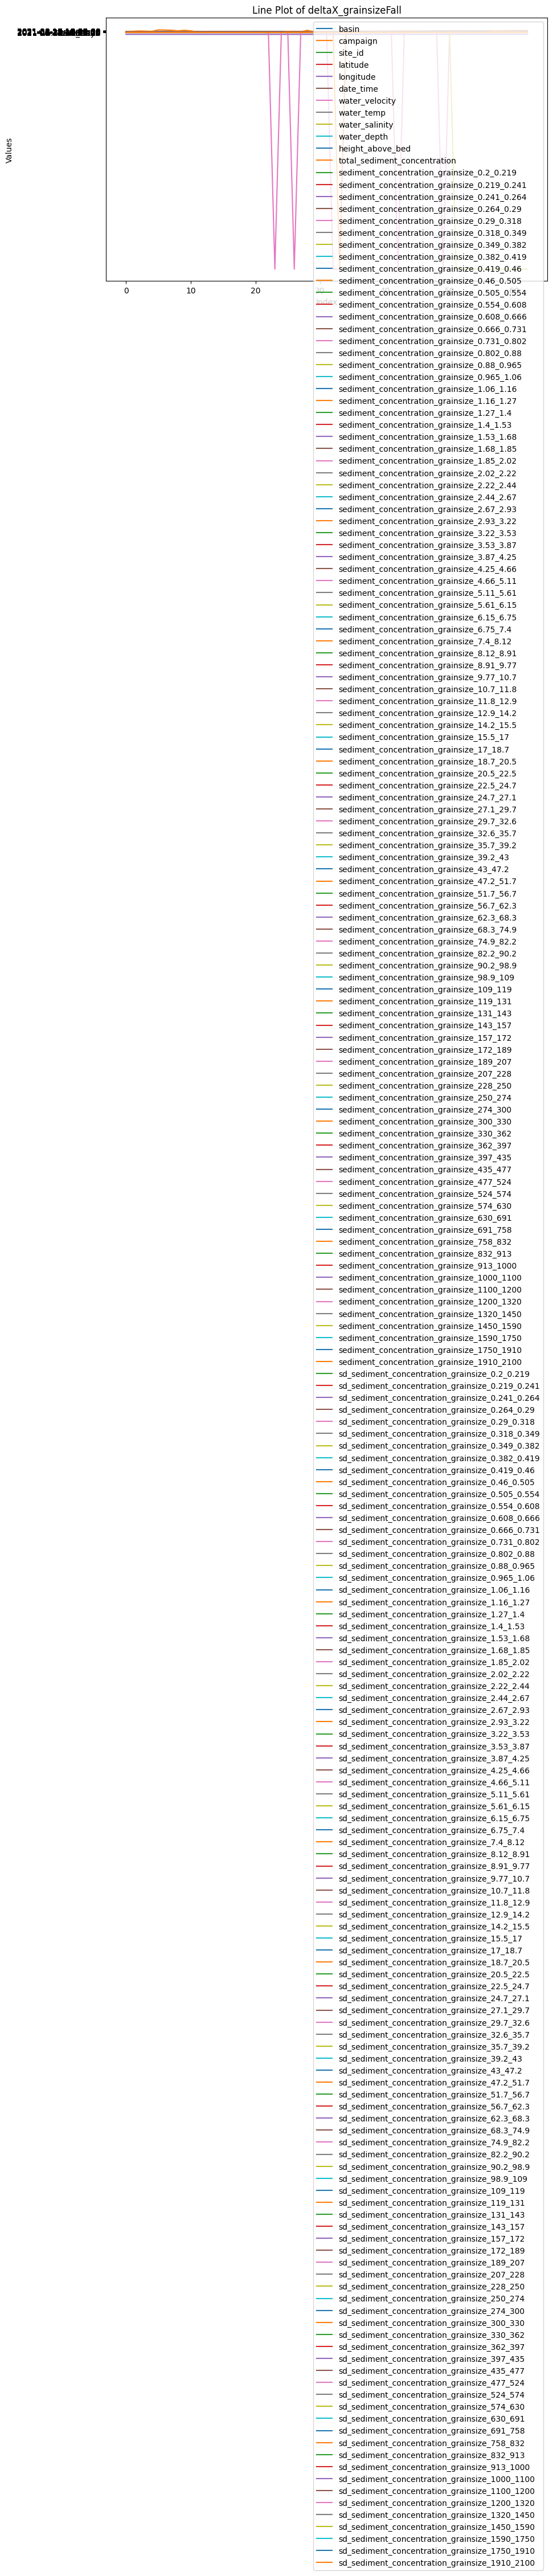

In [ ]:
plt.figure(figsize=(10, 6))
for col in deltaX_grainsizeFall.columns:
    plt.plot(deltaX_grainsizeFall[col], label=col)

plt.title('Line Plot of deltaX_grainsizeFall')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

<ipython-input-61-af704b54a1f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(deltaX_grainsizeFall.corr(), annot=True, cmap='coolwarm')


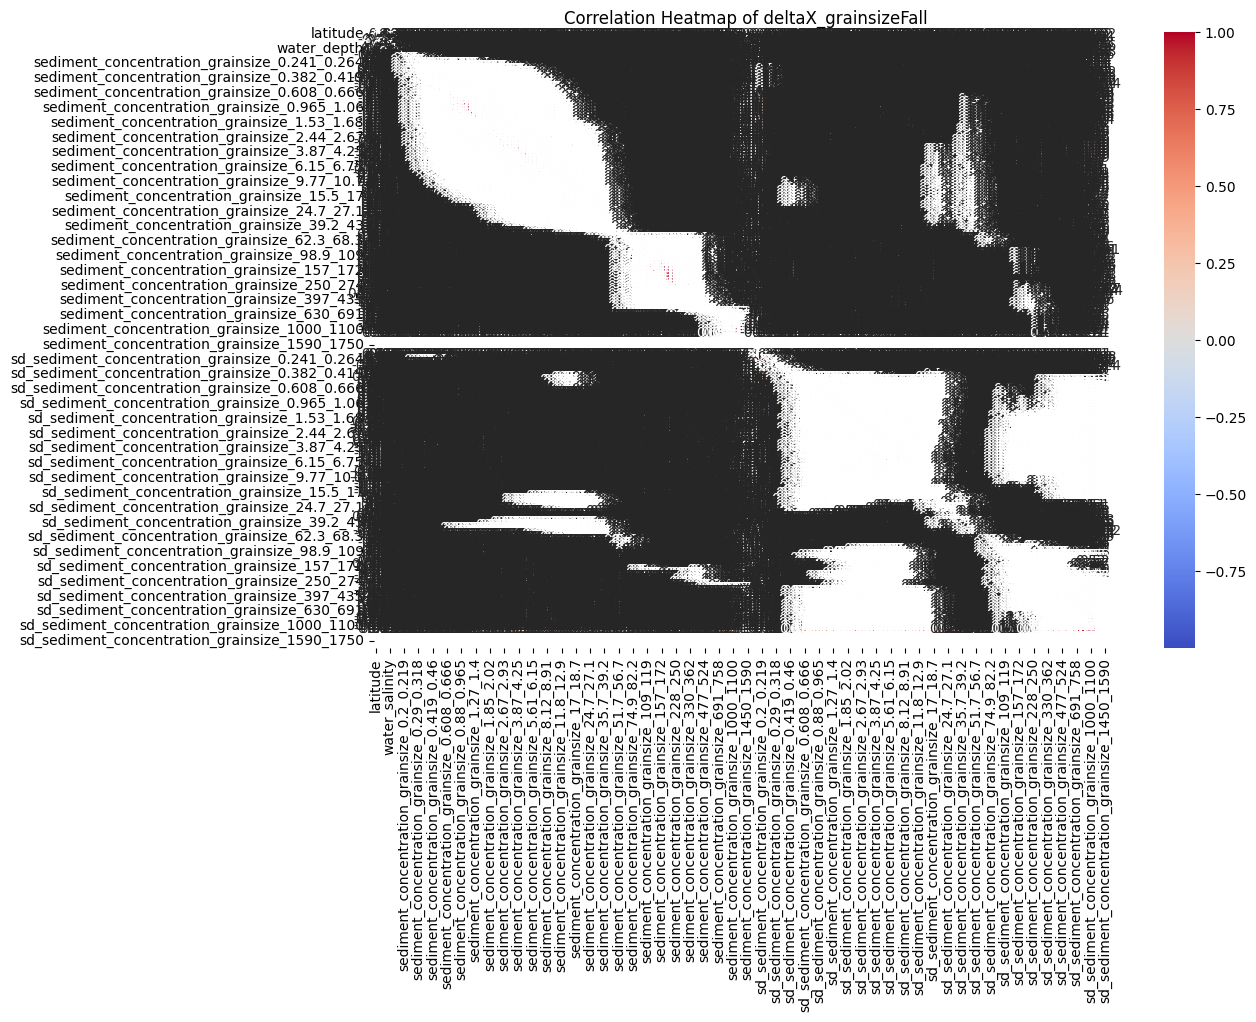

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(deltaX_grainsizeFall.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of deltaX_grainsizeFall')
plt.show()

In [ ]:

print(deltaX_grainsizeSpring.shape)
column_names = deltaX_grainsizeSpring.columns
for column in deltaX_grainsizeSpring.columns:
    print(f"Column: {column}, Data Type: {deltaX_grainsizeSpring[column].dtype}")

(45, 212)
Column: basin, Data Type: object
Column: campaign, Data Type: object
Column: site_id, Data Type: object
Column: latitude, Data Type: float64
Column: longitude, Data Type: float64
Column: date_time, Data Type: object
Column: water_velocity, Data Type: float64
Column: water_temp, Data Type: float64
Column: water_salinity, Data Type: float64
Column: water_depth, Data Type: float64
Column: height_above_bed, Data Type: float64
Column: total_sediment_concentration, Data Type: float64
Column: sediment_concentration_grainsize_0.2_0.219, Data Type: float64
Column: sediment_concentration_grainsize_0.219_0.241, Data Type: float64
Column: sediment_concentration_grainsize_0.241_0.264, Data Type: float64
Column: sediment_concentration_grainsize_0.264_0.29, Data Type: float64
Column: sediment_concentration_grainsize_0.29_0.318, Data Type: float64
Column: sediment_concentration_grainsize_0.318_0.349, Data Type: float64
Column: sediment_concentration_grainsize_0.349_0.382, Data Type: float64


<ipython-input-63-f6727d7354de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = deltaX_grainsizeSpring.corr()


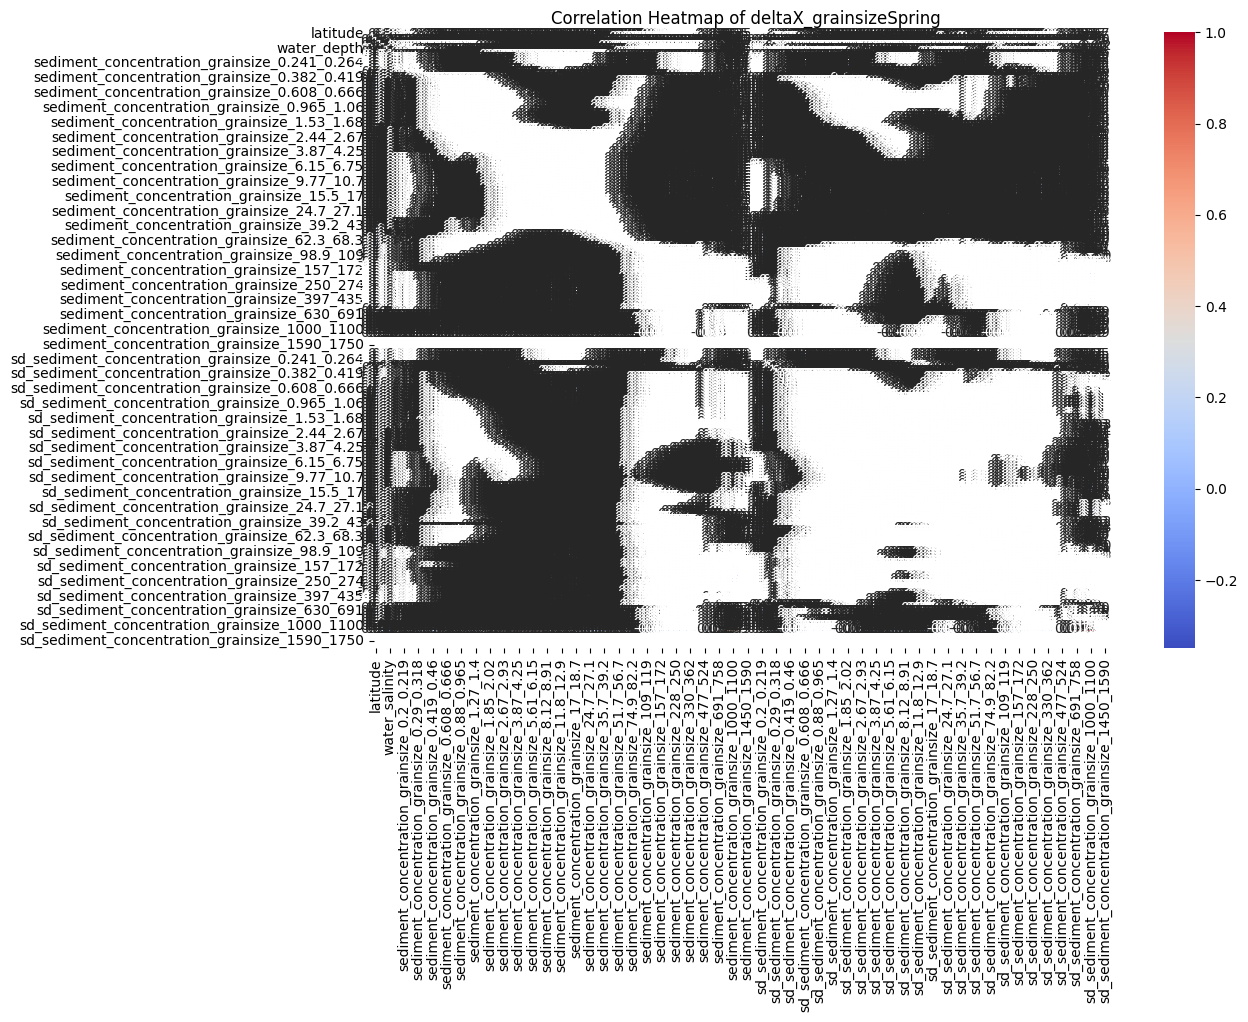

In [ ]:


# Compute the correlation matrix
correlation_matrix = deltaX_grainsizeSpring.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with a color map (choose a colormap that suits your preference)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap of deltaX_grainsizeSpring')
plt.show()


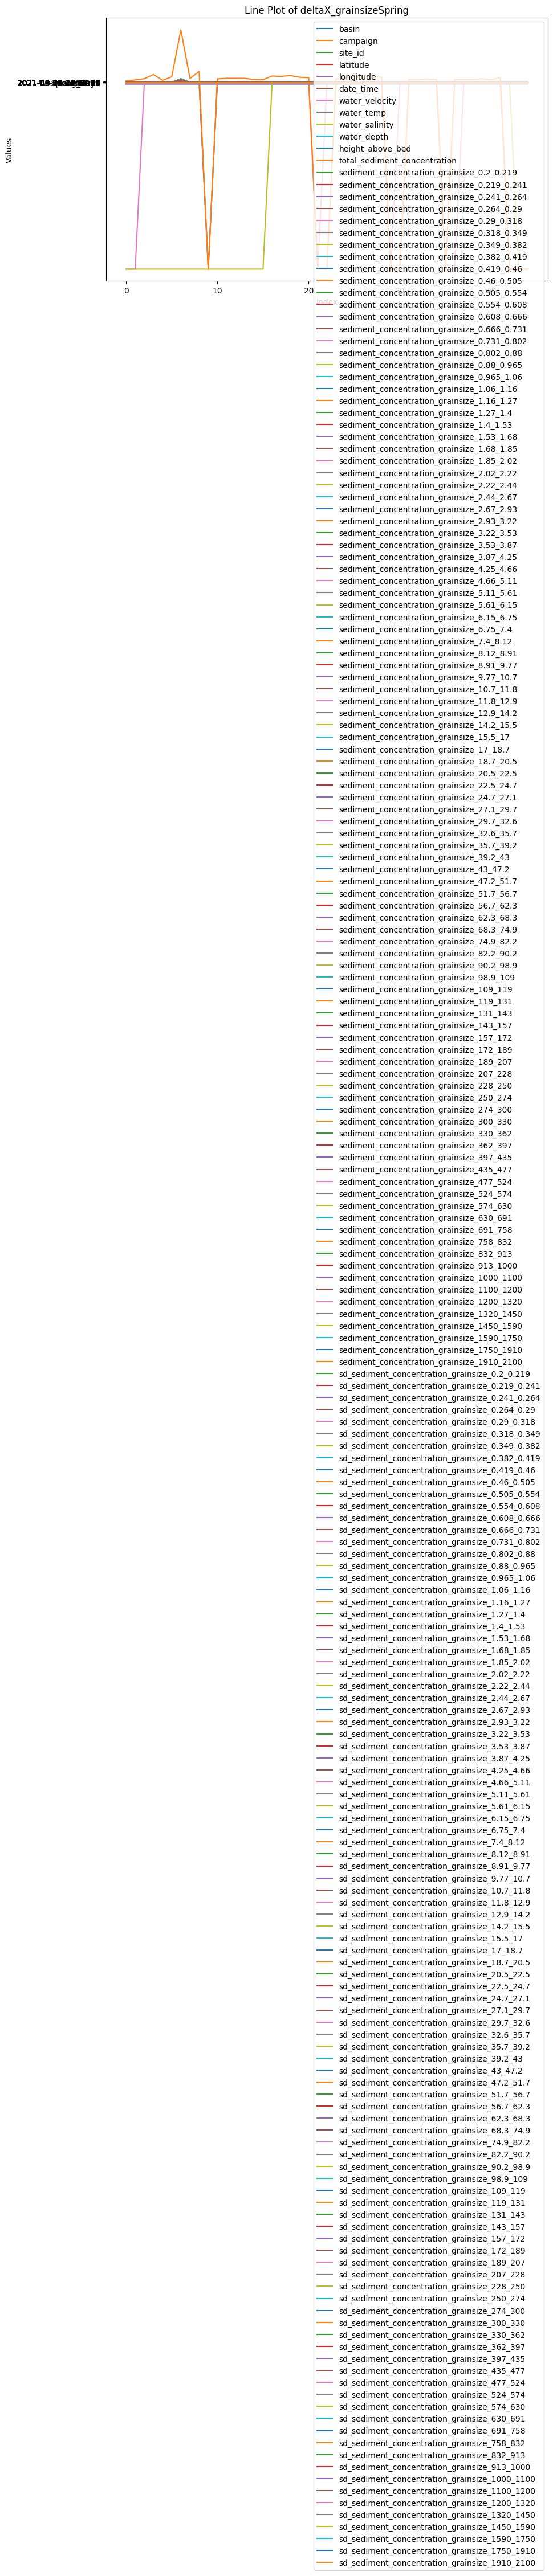

In [ ]:
plt.figure(figsize=(10, 6))
for col in deltaX_grainsizeSpring.columns:
    plt.plot(deltaX_grainsizeSpring[col], label=col)

plt.title('Line Plot of deltaX_grainsizeSpring')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:

print(pad_quality_2011.shape)
column_names = pad_quality_2011.columns
for column in pad_quality_2011.columns:
    print(f"Column: {column}, Data Type: {pad_quality_2011[column].dtype}")






(186, 13)
Column: pad_water_quality_2011.csv, Data Type: object
Column: Unnamed: 1, Data Type: object
Column: Unnamed: 2, Data Type: object
Column: Unnamed: 3, Data Type: object
Column: Unnamed: 4, Data Type: object
Column: Unnamed: 5, Data Type: object
Column: Unnamed: 6, Data Type: object
Column: Unnamed: 7, Data Type: object
Column: Unnamed: 8, Data Type: object
Column: Unnamed: 9, Data Type: object
Column: Unnamed: 10, Data Type: object
Column: Unnamed: 11, Data Type: object
Column: Unnamed: 12, Data Type: object


In [ ]:
print(pad_reflectance_2011.shape)
column_names = pad_reflectance_2011.columns
for column in pad_reflectance_2011.columns:
    print(f"Column: {column}, Data Type: {pad_reflectance_2011[column].dtype}")

(685, 178)
Column: pad_water_reflectance_2011.csv, Data Type: object
Column: Unnamed: 1, Data Type: object
Column: Unnamed: 2, Data Type: object
Column: Unnamed: 3, Data Type: object
Column: Unnamed: 4, Data Type: object
Column: Unnamed: 5, Data Type: object
Column: Unnamed: 6, Data Type: object
Column: Unnamed: 7, Data Type: object
Column: Unnamed: 8, Data Type: object
Column: Unnamed: 9, Data Type: object
Column: Unnamed: 10, Data Type: object
Column: Unnamed: 11, Data Type: object
Column: Unnamed: 12, Data Type: object
Column: Unnamed: 13, Data Type: object
Column: Unnamed: 14, Data Type: object
Column: Unnamed: 15, Data Type: object
Column: Unnamed: 16, Data Type: object
Column: Unnamed: 17, Data Type: object
Column: Unnamed: 18, Data Type: object
Column: Unnamed: 19, Data Type: object
Column: Unnamed: 20, Data Type: object
Column: Unnamed: 21, Data Type: object
Column: Unnamed: 22, Data Type: object
Column: Unnamed: 23, Data Type: object
Column: Unnamed: 24, Data Type: object
Colu

In [ ]:
print(pad_quality_2010.shape)
column_names = pad_quality_2010.columns
for column in pad_quality_2010.columns:
    print(f"Column: {column}, Data Type: {pad_quality_2010[column].dtype}")

(186, 14)
Column: pad_water_quality_2010.csv, Data Type: object
Column: Unnamed: 1, Data Type: object
Column: Unnamed: 2, Data Type: object
Column: Unnamed: 3, Data Type: object
Column: Unnamed: 4, Data Type: object
Column: Unnamed: 5, Data Type: object
Column: Unnamed: 6, Data Type: object
Column: Unnamed: 7, Data Type: object
Column: Unnamed: 8, Data Type: object
Column: Unnamed: 9, Data Type: object
Column: Unnamed: 10, Data Type: object
Column: Unnamed: 11, Data Type: object
Column: Unnamed: 12, Data Type: object
Column: Unnamed: 13, Data Type: object


In [ ]:
print(WaterLevel_Atchafalaya.shape)
column_names = WaterLevel_Atchafalaya.columns
for column in WaterLevel_Atchafalaya.columns:
    print(f"Column: {column}, Data Type: {WaterLevel_Atchafalaya[column].dtype}")

(970, 9)
Column: basin, Data Type: object
Column: site_id, Data Type: object
Column: latitude, Data Type: float64
Column: longitude, Data Type: float64
Column: bias, Data Type: int64
Column: calibration_source, Data Type: object
Column: time, Data Type: object
Column: absolute_water_level_NAVD88, Data Type: float64
Column: absolute_water_level_WGS84, Data Type: float64


<Axes: >

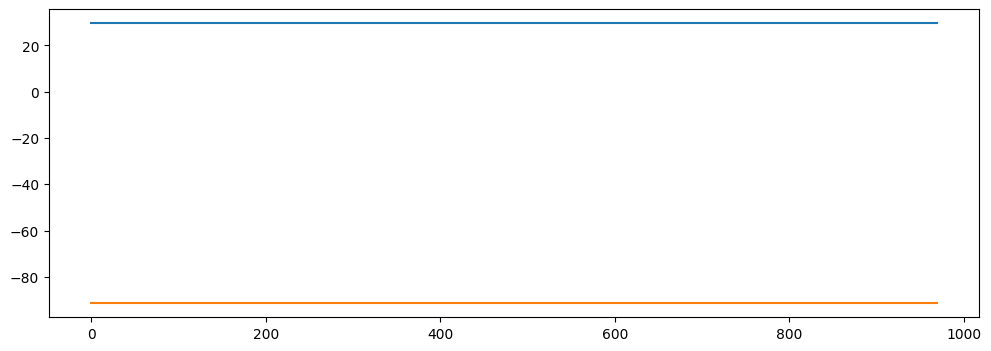

In [ ]:
WaterLevel_Atchafalaya['latitude'].plot(figsize=(12,4))
WaterLevel_Atchafalaya['longitude'].plot(figsize=(12,4))

<Axes: >

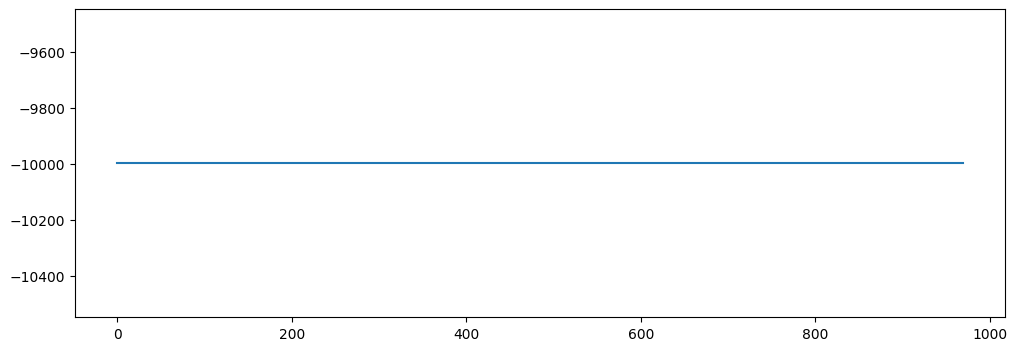

In [ ]:

WaterLevel_Atchafalaya['bias'].plot(figsize=(12,4))



<Axes: >

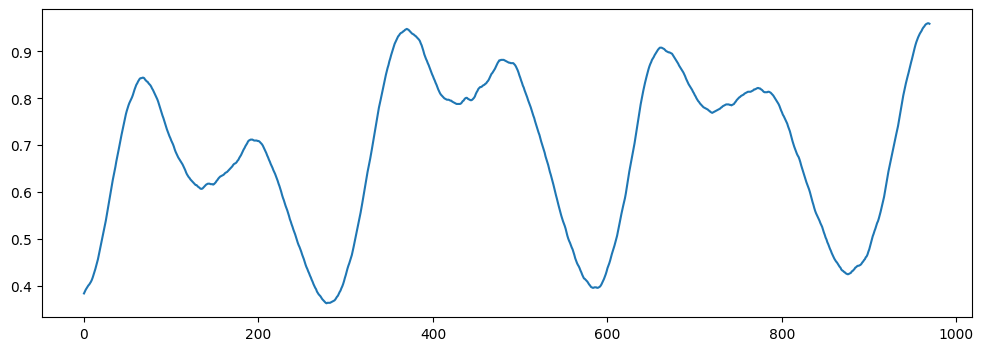

In [ ]:
WaterLevel_Atchafalaya['absolute_water_level_NAVD88'].plot(figsize=(12,4))


<Axes: >

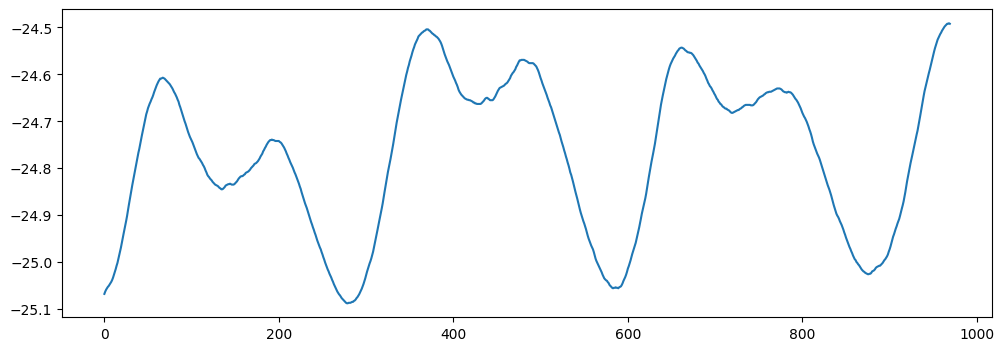

In [ ]:

WaterLevel_Atchafalaya['absolute_water_level_WGS84'].plot(figsize=(12,4))